In [2]:
import pandas as pd
import yfinance as yf

In [ ]:
df = yf.download('AAPL',start='2020-01-01')
# Adj Close is corrected for dividends
# For a time adjusted analysis we always pick the Adj Close

# Volume > number of shares traded that day

In [ ]:
# Last month only
close = df['01-09-2023':]['Close']

In [ ]:
# Shift Function
# shifts all values to the next row
# we can also use the axis parameter to specify between row and column
df_shifted = df.shift(1)
# to roll back:
close.shift(-3)

# it's useful to calucalte daily changes within the stock price
df['Daily Change'] = round((((df.Close / df_shifted.Close)-1)*100),2)
df.head(10)

In [33]:
# Dif Function
df['Open'].diff()
# calcluates the difference between a value and the previous one

Date
2020-01-02          NaN
2020-01-03     0.227501
2020-01-06    -0.839996
2020-01-07     1.512497
2020-01-08    -0.669998
                ...    
2023-09-01     1.650009
2023-09-05    -1.210007
2023-09-06     0.119995
2023-09-07   -13.220001
2023-09-08     3.170013
Name: Open, Length: 928, dtype: float64

In [32]:
# Rolling Function
# rolls over a number of rows to make a specific calucaltions
# ex. x day moving average

df.Close.rolling(10).mean().dropna()

Date
2020-01-15     76.502499
2020-01-16     76.874749
2020-01-17     77.407249
2020-01-21     77.826500
2020-01-22     78.309250
                 ...    
2023-09-01    181.846999
2023-09-05    183.232999
2023-09-06    183.800999
2023-09-07    183.445000
2023-09-08    183.624998
Name: Close, Length: 919, dtype: float64

In [ ]:
# Dropna Function
# the axis parameter determines wether we want to remove it row-based or column-based
# .dropna(axis = 0) row
# .dropna(axis = 1) column

In [ ]:
df['Close'].nlargest(5)
# returns the rows with the highest values
df['Close'].nsmallest(5)
# the opposite

In [43]:
# Concat Function
# here too we have the axis parameter
df1 = pd.DataFrame([1,2])
df2 = pd.DataFrame([3,4])

pd.concat([df1,df2])

,0
0,1
1,2
0,3
1,4


In [ ]:
# Drop Duplicates
df.drop_duplicates()

In [47]:
# Resempling Data
# How to go from daily to monthly?
df['Volume'].resample('M').sum().head()

Date
2020-01-31    2934370400
2020-02-29    3019279200
2020-03-31    6280072400
2020-04-30    3265299200
2020-05-31    2805936000
Freq: M, Name: Volume, dtype: int64

In [56]:
# Monthly Max Value
monthly = df.resample('M').sum()
monthly['Volume'].nlargest(5)

Date
2020-03-31    6280072400
2020-08-31    4070061100
2020-09-30    3885245100
2020-04-30    3265299200
2020-06-30    3243375600
Name: Volume, dtype: int64

In [59]:
# Aggregating data
# taking only the values that interest us
df.resample('M').agg({
    'Open':'first',
    'High':'max',
    'Low':'min',
    'Close':'last'

}).head()

,Open,High,Low,Close
Date,,,,
2020-01-31,74.059998,81.962502,73.187500,77.377502
2020-02-29,76.074997,81.805000,64.092499,68.339996
2020-03-31,70.570000,76.000000,53.152500,63.572498
2020-04-30,61.625000,73.632500,59.224998,73.449997
2020-05-31,71.562500,81.059998,71.462502,79.485001


<Axes: xlabel='Date'>

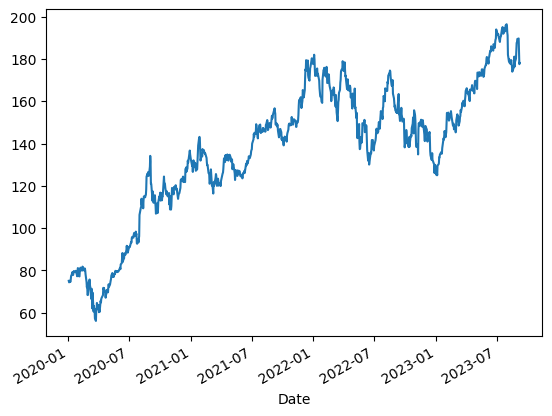

In [60]:
# Plotting in Pandas
df.Close.plot()

<Axes: xlabel='Date'>

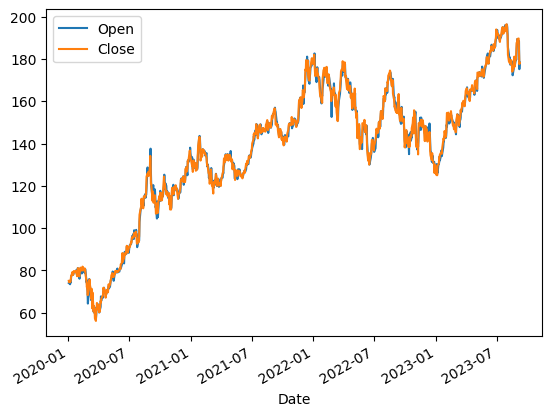

In [61]:
df[['Open','Close']].plot()

<Axes: xlabel='Date'>

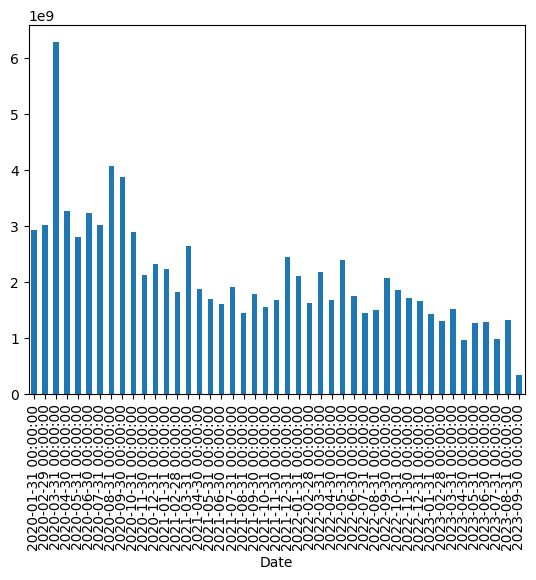

In [62]:
df.resample('M').sum().Volume.plot(kind='bar')

In [66]:
# Iterating over dataframes
# iteration should be avoided whenever possible as it is slower compared to built-in functions

counter = 0
for index,row in df.iterrows():
  counter += 1

print(counter)
print(df.shape)


928
(928, 7)


In [ ]:
import numpy as np

test_df = yf.download('TSLA', start = '2023-09-01')

In [71]:
# Return Formula:
# (price today - price today before) / price day before
# or
# today / before -1

# What about a 5-day return? (cumulative return)
# day 5 / day 1 -1

tesla_returns = test_df.Close.pct_change()
tesla_returns

Date
2023-09-01         NaN
2023-09-05    0.046855
2023-09-06   -0.017817
2023-09-07   -0.001707
2023-09-08   -0.011889
Name: Close, dtype: float64

In [76]:
# Cumulative Return Formula:
# (1 + return pct)*(1 + return pct prior day) -1

test_df.Close / test_df.Close.shift(4) - 1

Date
2023-09-01         NaN
2023-09-05         NaN
2023-09-06         NaN
2023-09-07         NaN
2023-09-08    0.014244
Name: Close, dtype: float64

In [77]:
# Log Return Formula:
# lin(1+ return)
# log returns provide symmetrical percentages (assymetrical > +1% day one and -1% day two do not privide the same result)

cumu = (1 + tesla_returns).cumprod() - 1

Date
2023-09-01         NaN
2023-09-05    0.046855
2023-09-06    0.028203
2023-09-07    0.026448
2023-09-08    0.014244
Name: Close, dtype: float64

In [78]:
np.log(1+tesla_returns)

Date
2023-09-01         NaN
2023-09-05    0.045791
2023-09-06   -0.017978
2023-09-07   -0.001708
2023-09-08   -0.011960
Name: Close, dtype: float64

In [80]:
np.exp(np.log(1+tesla_returns).cumsum()) -1

Date
2023-09-01         NaN
2023-09-05    0.046855
2023-09-06    0.028203
2023-09-07    0.026448
2023-09-08    0.014244
Name: Close, dtype: float64

[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

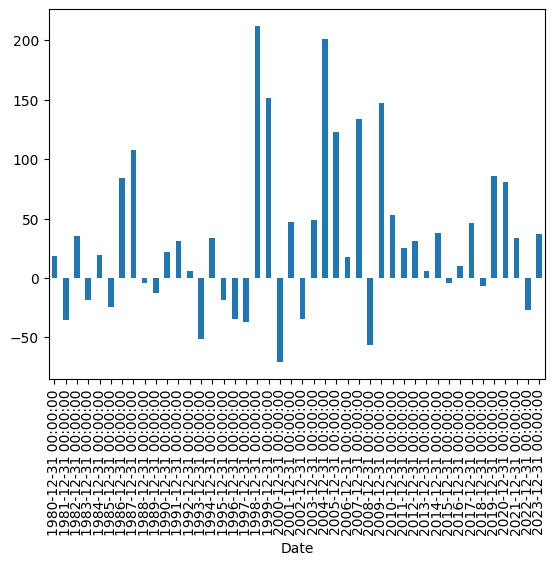

In [119]:
# Yearly Returns

df = yf.download('AAPL')

df['Return'] = df.Close.pct_change()
df.dropna(inplace=True)

yearly = ((1+df).resample('Y').prod() -1 )*100
yearly['Return'].plot(kind='bar')

In [ ]:
# Other Solution
df.resample('Y').last().Close.pct_change()